# Signal filtering

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from scipy.signal import freqz
from qtt.algorithms.filtering import butter_lowpass, butter_lowpass_filter

## Define Butter low-pass filter

Code is adapted from https://stackoverflow.com/questions/25191620/creating-lowpass-filter-in-scipy-understanding-methods-and-units#%20creating-lowpass-filter-in-scipy-understanding-methods-and-units

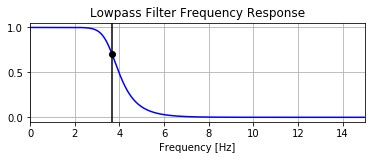

In [2]:
# Filter requirements.
order = 6
fs = 30.0       # sample rate, Hz
cutoff = 3.667  # desired cutoff frequency of the filter, Hz

# Get the filter coefficients so we can check its frequency response.
b, a = butter_lowpass(cutoff, fs, order)

w, h = freqz(b, a, worN=8000)
plt.subplot(2, 1, 1)
plt.plot(0.5*fs*w/np.pi, np.abs(h), 'b')
plt.plot(cutoff, 0.5*np.sqrt(2), 'ko')
plt.axvline(cutoff, color='k')
plt.xlim(0, 0.5*fs)
plt.title("Lowpass Filter Frequency Response")
plt.xlabel('Frequency [Hz]')
plt.grid()

## Apply the filter to a noisy periodic signal

In [3]:
T = 5.0             # seconds
n = int(T * fs)     # total number of samples
t = np.linspace(0, T, n, endpoint=False)
raw_signal = np.sin(1.2*2*np.pi*t) + 1.5*np.cos(9*2*np.pi*t) \
        + 0.5*np.sin(12.0*2*np.pi*t)

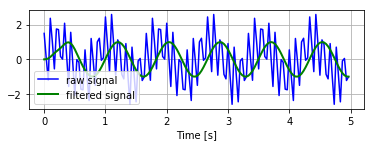

In [5]:
filtered_signal = butter_lowpass_filter(raw_signal, cutoff, fs, order)

plt.subplot(2, 1, 2)
plt.plot(t, raw_signal, 'b-', label='raw signal')
plt.plot(t, filtered_signal, 'g-', linewidth=2, label='filtered signal')
plt.xlabel('Time [s]')
plt.grid()
_=plt.legend()